In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
folderpath=r"C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy"
os.chdir(folderpath)
print("current directory:",os.getcwd())

current directory: C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy


In [3]:
print("C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing")


C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing


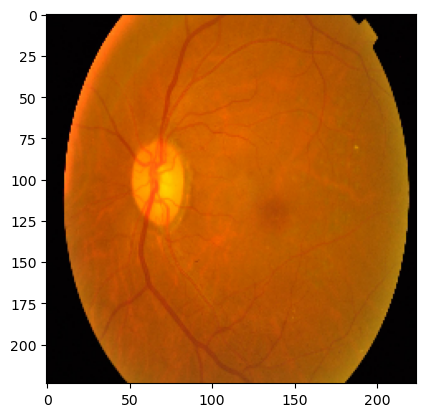

In [4]:
img = image.load_img("C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing\\Mild\\0a61bddab956.png")
plt.imshow(img)

In [5]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\train\\',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\validation\\',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [6]:
!pip install -q efficientnet

In [7]:
import efficientnet.tfkeras as efn
from tensorflow.keras.metrics import Precision, Recall

In [8]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
    
def f1score(y_true, y_pred):
    
    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    p = precision.result()
    r = recall.result()
    
    f1 = 2 * (p * r) / (p + r + tf.keras.backend.epsilon())  
    return f1

In [9]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy",Precision(), Recall(), f1score])

In [24]:

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(train_data,validation_data = valid_data,callbacks=[early_stopping,lr_scheduler],epochs=100,verbose=1)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8611 - f1score: 0.7811 - loss: 0.3593 - precision_1: 0.8801 - recall_1: 0.8402 - val_accuracy: 0.8098 - val_f1score: 0.7830 - val_loss: 0.5270 - val_precision_1: 0.8331 - val_recall_1: 0.7921 - learning_rate: 6.2500e-05
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8655 - f1score: 0.7837 - loss: 0.3486 - precision_1: 0.8878 - recall_1: 0.8401 - val_accuracy: 0.7893 - val_f1score: 0.7851 - val_loss: 0.5008 - val_precision_1: 0.8153 - val_recall_1: 0.7729 - learning_rate: 6.2500e-05
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8653 - f1score: 0.7858 - loss: 0.3526 - precision_1: 0.8983 - recall_1: 0.8484 - val_accuracy: 0.8071 - val_f1score: 0.7873 - val_loss: 0.5132 - val_precision_1: 0.8316 - val_recall_1: 0.7770 - learning_rate: 6.2500e-05
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8570 - f1score: 0.7878 - loss: 0.3884 - precision_1: 0.8795 - recall_1: 0.83

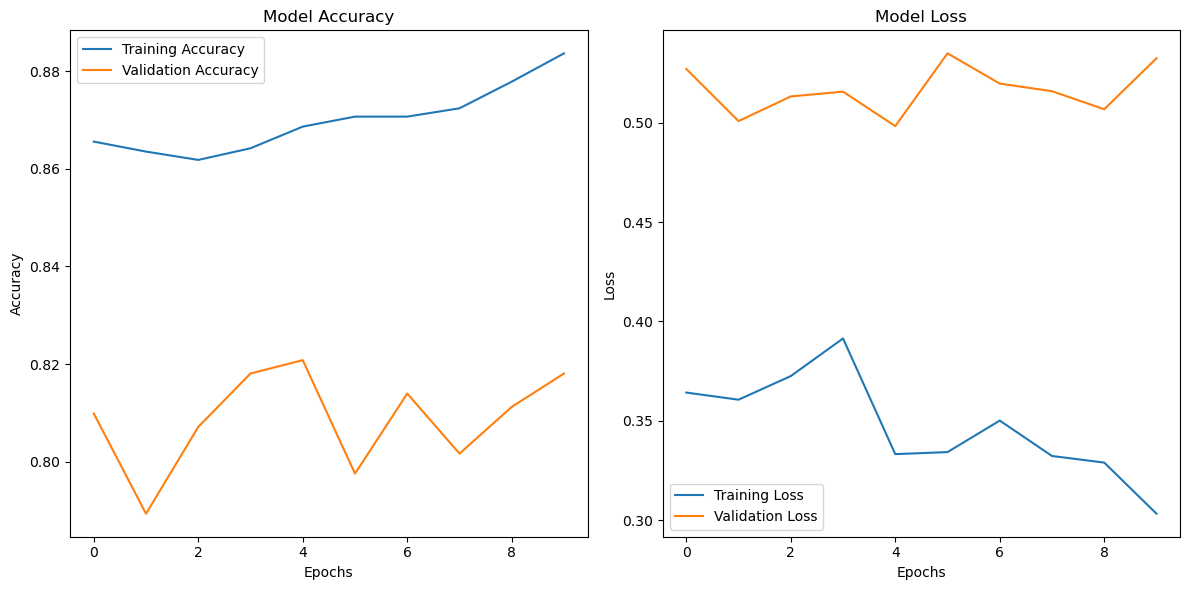

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
print(history.history.keys())

dict_keys(['accuracy', 'f1score', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_f1score', 'val_loss', 'val_precision_1', 'val_recall_1', 'learning_rate'])


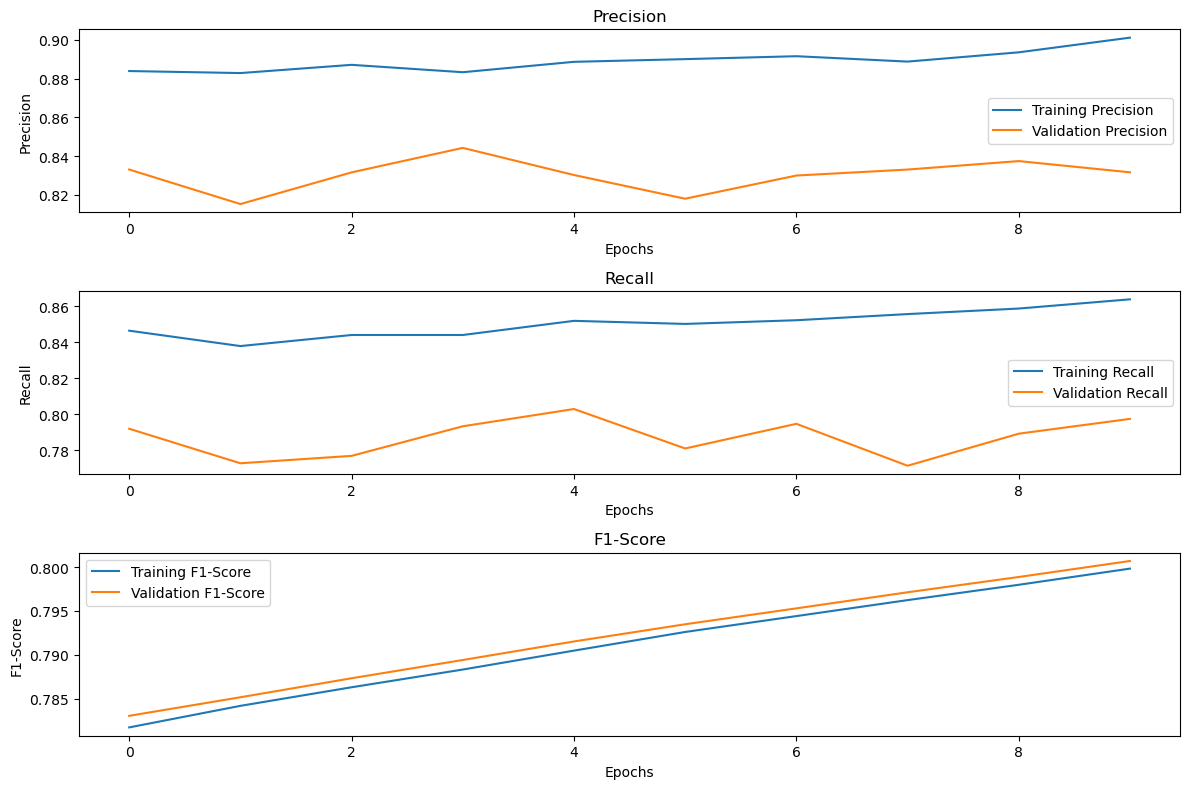

In [26]:
# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(12, 8))

# Precision
plt.subplot(3, 1, 1)
plt.plot(history.history['precision_1'], label='Training Precision')
plt.plot(history.history['val_precision_1'], label='Validation Precision')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(3, 1, 2)
plt.plot(history.history['recall_1'], label='Training Recall')
plt.plot(history.history['val_recall_1'], label='Validation Recall')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1-Score
plt.subplot(3, 1, 3)
plt.plot(history.history['f1score'], label='Training F1-Score')
plt.plot(history.history['val_f1score'], label='Validation F1-Score')
plt.title('F1-Score')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
test_generator =datagen.flow_from_directory(
    directory=r'C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
result=model.evaluate(test_generator)


Found 3662 images belonging to 5 classes.


c:\Users\santhosh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 44s 378ms/step - accuracy: 0.8672 - f1score: 0.8012 - loss: 0.3391 - precision_1: 0.8741 - recall_1: 0.8532


In [30]:
accuracy = result[1] 
precision = precision_score(y_true, y_pred, average='weighted') 
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
loss=result[0]


print(f"Model accuracy: {accuracy * 100:.2f}%")
print(f"Model loss: {loss * 100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

Model accuracy: 87.06%
Model loss: 34.00%
Precision: 87.16%
Recall: 86.70%
F1-Score: 86.48%


In [29]:
y_pred = np.argmax(model.predict(test_generator), axis=-1) 
y_true = test_generator.classes 

correct_predictions = np.sum(y_pred == y_true)
total_samples = len(y_true)

print(f"Number of correctly classified samples: {correct_predictions} out of {total_samples}")
print(f"Accuracy (in numbers): {correct_predictions}")

115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 400ms/step
Number of correctly classified samples: 3175 out of 3662
Accuracy (in numbers): 3175


In [21]:
def predict_new(path):
    img = cv2.imread(path)
    predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)
    
    print(f"Predicted: {predictions[pred[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted: NO_DR


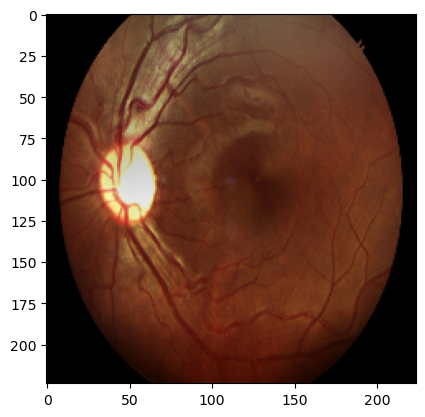

In [39]:
predict_new(r'C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\train\No_DR\0ce062f26edc.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted: Proliferate_DR


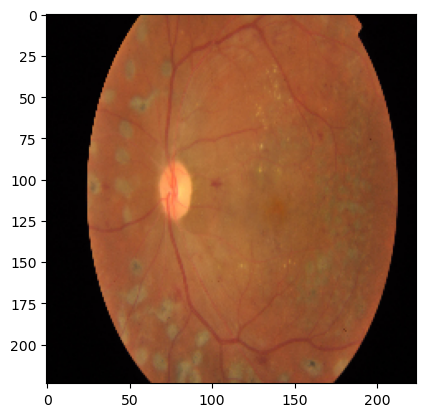

In [36]:
predict_new(r'C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\train\Proliferate_DR\4a3da369b227.png')

In [38]:
model.save('myeffb0_model.h5')